## Ear Ache tweets, reddit, and google search compared to Glue Ear, Glioma, and TMJ tweets, reddit, and google search

In [154]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt 
from textblob import TextBlob 
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix 
 
np.random.seed(507) 
 


In [155]:
reviews = pd.read_csv('EarAchesOther.csv', encoding = 'unicode_escape') 
#the encoding needed for python3 handling nonASCII chars


In [156]:
reviews.head()


,Comment,Type,Source
0,"Nov 28, 2012\n I got antibiotics for the jaw, ...",earAche,twitter
1,"Dec 8, 2013\nthese antibiotics are not working...",earAche,twitter
2,"Feb 19, 2011\nSevere toothache still here...no...",earAche,twitter
3,"Oct 19, 2017\n7 straight days with unknownache...",earAche,twitter
4,"Jun 15, 2014\nnot really hun throat pain and u...",earAche,twitter


In [157]:
reviews.tail()

,Comment,Type,Source
71,Some causes of unknown pain can be serious suc...,earAche,webMD
72,"A cold, allergies, or a sinus infection can bl...",earAche,webMD
73,Your unknown makes and gets rid of wax all the...,earAche,webMD
74,"Most of the time, your unknown does a great jo...",earAche,webMD
75,If your unknown hurts when you pull on your un...,earAche,webMD


In [158]:
reviews.shape

(76, 3)

In [160]:
reviews = reviews.reindex(np.random.permutation(reviews.index))

print(reviews.head())
print(reviews.tail())

                                              Comment     Type      Source
43  crazy unknown pain HELP!\n\nLast week I was ta...  earAche      Reddit
63  There are many different kinds of headaches, b...      tmj  healthline
2   Feb 19, 2011\nSevere toothache still here...no...  earAche     twitter
23  Oct 11, 2009\nunknown Solution - Watch That un...      tmj     twitter
1   Dec 8, 2013\nthese antibiotics are not working...  earAche     twitter
                                              Comment     Type   Source
56  I started clenching when my dose was increased...      tmj   Reddit
51  unknown pain, can't figure out how to make it ...  earAche   Reddit
46  Possible cause of unknown pain\n\nSo I got the...  earAche   Reddit
42  Apr 9\nBecause she?s a three-season athlete, e...   glioma  twitter
19  Mar 15, 2010\nwww.ToothTime.ca +99% Cheap Fitn...      tmj  twitter


In [161]:


reviews.groupby('Type').describe()



Comment                                                            \
          count unique                                                top   
Type                                                                        
earAche      32     32  Injury, infection, irritation in the unknown, ...   
glioma        9      9  Jun 15, 2009\nunknown News: Young Obama fan 'n...   
glueEar      10     10  Nov 30\nWatch Consultant ENT Surgeon, Mr Steph...   
tmj          25     25  Mar 27, 2010\nFatigue, unknown, unknownache, b...   

             Source                       
        freq  count unique      top freq  
Type                                      
earAche    1     32      4  twitter   11  
glioma     1      9      2  twitter    8  
glueEar    1     10      3  twitter    6  
tmj        1     25      3  twitter   18

In [162]:


reviews['length'] = reviews['Comment'].map(lambda text: len(text))
print(reviews.head())



                                              Comment     Type      Source  \
43  crazy unknown pain HELP!\n\nLast week I was ta...  earAche      Reddit   
63  There are many different kinds of headaches, b...      tmj  healthline   
2   Feb 19, 2011\nSevere toothache still here...no...  earAche     twitter   
23  Oct 11, 2009\nunknown Solution - Watch That un...      tmj     twitter   
1   Dec 8, 2013\nthese antibiotics are not working...  earAche     twitter   

    length  
43     689  
63     446  
2      132  
23      56  
1       88  


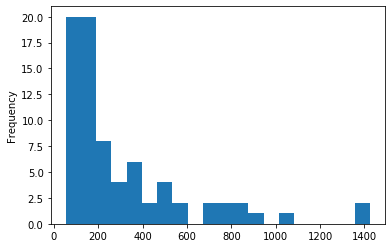

In [163]:
reviews.length.plot(bins=20, kind='hist') 

In [164]:
reviews.length.describe()

count      76.000000
mean      306.552632
std       294.508422
min        54.000000
25%       112.000000
50%       164.000000
75%       376.250000
max      1426.000000
Name: length, dtype: float64

In [165]:
print(list(reviews.Comment[reviews.length > 1100].index)) #near the max for length of LemmatizedTweets
print(list(reviews.Type[reviews.length > 1100]))
print(list(reviews.Comment[reviews.length > 1100]))

[53, 50]
['tmj', 'earAche']
['Can impacted wisdom teeth cause unknown or naw pain/issues?\nQuestion(s)\n\nI?m 24. I still have my wisdom teeth. I haven?t been to the dentist in yunknowns (no dental insurance). I know I have impacted wisdom teeth because I can see them when I open my mouth and how squished they look way in the back. They never fully grew in because there?s not enough room. Just my wisdom teeth alone can hurt or feel uncomfortable at times. My bottom teeth have become more crooked over the last couple yunknowns as well - I?m assuming because there?s not enough space in my mouth and the wisdom teeth are pushing them closer together.\n\nAnyways, I?ve noticed more crackling and popping in my jaw the last yunknown or so. It doesn?t always bother me just sort of an annoyance when I hunknown it. Today, however, I woke up with pretty horrible pain in my jaw - especially the left side. I found it painful to eat, yawn, or talk. I took some ibuprofen and continued on with my day.\

Wall time: 250 ms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000156D3340400>,
      dtype=object)

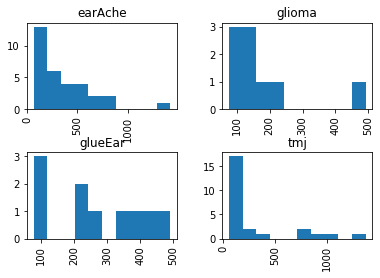

In [166]:
%%time
reviews.hist(column='length', by='Type', bins=10)

In [167]:
def split_into_tokens(review):
    
    #review = unicode(review, 'iso-8859-1')# in python 3 the default of str() previously python2 as unicode() is utf-8
    return TextBlob(review).words

In [168]:


reviews.Comment.head().apply(split_into_tokens)



43    [crazy, unknown, pain, HELP, Last, week, I, wa...
63    [There, are, many, different, kinds, of, heada...
2     [Feb, 19, 2011, Severe, toothache, still, here...
23    [Oct, 11, 2009, unknown, Solution, Watch, That...
1     [Dec, 8, 2013, these, antibiotics, are, not, w...
Name: Comment, dtype: object

In [170]:
TextBlob("hello world, how is it going?").tags

[('hello', 'JJ'),
 ('world', 'NN'),
 ('how', 'WRB'),
 ('is', 'VBZ'),
 ('it', 'PRP'),
 ('going', 'VBG')]

In [171]:


import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [172]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
stop = stop + [u'a',u'b',u'c',u'd',u'e',u'f',u'g',u'h',u'i',u'j',u'k',u'l',u'm',u'n',u'o',u'p',u'q',u'r',u's',u't',u'v',u'w',u'x',u'y',u'z']

In [173]:
def split_into_lemmas(review):
    #review = unicode(review, 'iso-8859-1')
    review = review.lower()
    #review = unicode(review, 'utf8').lower()
    #review = str(review).lower()
    words = TextBlob(review).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words if word not in stop]

reviews.Comment.head().apply(split_into_lemmas)

43    [crazy, unknown, pain, help, last, week, takin...
63    [many, different, kind, headache, unknown, hea...
2     [feb, 19, 2011, severe, toothache, still, also...
23    [oct, 11, 2009, unknown, solution, watch, unkn...
1     [dec, 8, 2013, antibiotic, working, still, got...
Name: Comment, dtype: object

In [199]:
%%time
# bag of words on the comments
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(reviews['Comment'])
print(len(bow_transformer.vocabulary_))


1004
Wall time: 250 ms


In [200]:
review4 = reviews['Comment'][14]
print(review4)

Dec 12, 2011
unknown or unknownache? Ouch I'm hurting!


In [201]:
bow4 = bow_transformer.transform([review4])


In [202]:
%%time
reviews_bow = bow_transformer.transform(reviews['Comment'])
print('sparse matrix shape:', reviews_bow.shape)
print('number of non-zeros:', reviews_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * reviews_bow.nnz / (reviews_bow.shape[0] * reviews_bow.shape[1])))

sparse matrix shape: (76, 1004)
number of non-zeros: 1978
sparsity: 2.59%
Wall time: 234 ms


In [203]:

#reviews was permutated earlier, so taking the order is random
# Split/splice into training ~ 80% and testing ~ 20%
reviews_bow_train = reviews_bow[:50]
reviews_bow_test = reviews_bow[50:]
reviews_sentiment_train = reviews['Type'][:50]
reviews_sentiment_test = reviews['Type'][50:]

print(reviews_bow_train.shape)
print(reviews_bow_test.shape)



(50, 1004)
(26, 1004)


In [204]:
reviews_sentiment_test.unique()

array(['glueEar', 'tmj', 'earAche', 'glioma'], dtype=object)

In [205]:


%time 
review_sentiment = MultinomialNB().fit(reviews_bow_train, reviews_sentiment_train)



Wall time: 0 ns


In [206]:

print('predicted:', review_sentiment.predict(bow4)[0])
print('expected:', reviews.Type[14])



predicted: tmj
expected: tmj


In [207]:


predictions = review_sentiment.predict(reviews_bow_test)
print(predictions)



['glioma' 'glueEar' 'tmj' 'earAche' 'earAche' 'tmj' 'tmj' 'tmj' 'tmj'
 'earAche' 'earAche' 'glueEar' 'tmj' 'glueEar' 'earAche' 'tmj' 'tmj'
 'earAche' 'earAche' 'tmj' 'tmj' 'earAche' 'tmj' 'earAche' 'tmj' 'tmj']


In [208]:
print('accuracy', accuracy_score(reviews_sentiment_test, predictions))
print('confusion matrix\n', confusion_matrix(reviews_sentiment_test, predictions))
print('(row=expected, col=predicted)')

accuracy 0.6153846153846154
confusion matrix
 [[7 0 1 3]
 [0 0 0 3]
 [0 1 2 0]
 [2 0 0 7]]
(row=expected, col=predicted)


In [209]:
print(classification_report(reviews_sentiment_test, predictions))
#The F1 score can be interpreted as a weighted average of the precision and recall, 
#where an F1 score reaches its best value at 1 and worst score at 0.

              precision    recall  f1-score   support

     earAche       0.78      0.64      0.70        11
      glioma       0.00      0.00      0.00         3
     glueEar       0.67      0.67      0.67         3
         tmj       0.54      0.78      0.64         9

    accuracy                           0.62        26
   macro avg       0.50      0.52      0.50        26
weighted avg       0.59      0.62      0.59        26



In [210]:
def predict_review(new_review): 
    new_sample = bow_transformer.transform([new_review])
    print(new_review, np.around(review_sentiment.predict_proba(new_sample), decimals=2), 
          '\n')

In [211]:
# Values returned alphabatized for Type: earAche, glioma, glueEar, tmj
predict_review('driving to the hospital.')

predict_review('teeth.')

predict_review('headphones. head phones.')
predict_review('sleeping. pain.')

predict_review('carbs galore and no energy')

driving to the hospital. [[0.29 0.13 0.29 0.29]] 

teeth. [[0.26 0.03 0.03 0.68]] 

headphones. head phones. [[0.67 0.06 0.06 0.21]] 

sleeping. pain. [[0.64 0.07 0.04 0.26]] 

carbs galore and no energy [[0.42 0.12 0.14 0.32]] 



In [139]:
reviews.groupby('Type').describe()

length                                                             
         count        mean         std   min     25%    50%     75%     max
Type                                                                       
earAche   32.0  350.656250  295.912434  63.0  143.25  267.5  485.75  1426.0
glioma     9.0  175.777778  125.247533  76.0  108.00  153.0  163.00   492.0
glueEar   10.0  261.200000  149.005444  78.0  122.75  249.5  371.00   491.0
tmj       25.0  315.320000  366.667392  54.0  105.00  158.0  233.00  1371.0

In [140]:
print(32/76)
print(9/76)
print(10/76)
print(25/76)

0.42105263157894735
0.11842105263157894
0.13157894736842105
0.32894736842105265


If you get back the probabilities, it is because there weren't a bag of words generated or improperly set to the type
instead of the comments or reviews.